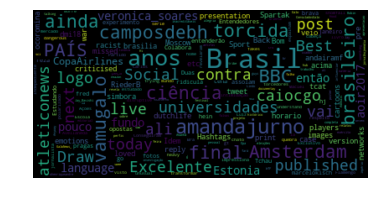

o nome oficial do carlosdand é: Carlos d'Andréa
a descricao do carlosdand é: Professor of Communication Studies at UFMG, Brazil. Visiting Scholar at University of Amsterdam. Tweets and RTs about tech politics music football (#galo!) etc
o usuario carlosdand tem 1905 seguidores no Twitter
o site do carlosdand e https://t.co/yEKaeq55PN
test


In [62]:
###########################################
# Ferramenta de coleta de dados do Twitter
# Dados de um usuário e nuvem de palavras
# janeiro de 2018
# Curso do Knight Center
# Tweepy para acessar o Twitter
###########################################

#importanto coisas importantes
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

#cria uma api do twitter
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# QUE ARROBA VC ESTA PROCURANDO??
arroba = 'carlosdand'

# CRIA NUVEM DE PALAVRAS
def nuvem_palavras(usuario):
    
    stopwords =  open("stopwords-br.txt","r").read()
    
    # pega a timeline de um usuário
    timeline = api.user_timeline(usuario, count=200, include_rts=False)

    string = ''

    #coloca os tweets na lista
    for tweet in timeline:
        tweetsemlink = re.sub(r"http\S+", "", str(tweet.text))#remove links de tweets
        
        string += str(tweetsemlink)
        #print(tweet.text)
    
    #transforma uma str com vários tweets em lista de palavras
    wordList = re.sub("[^\w]", " ",  string).split()
    
    #for word in wordList:
    #    word.lower()
    #print(wordList)
    
    #remove as stopwords e coloca numa lista
    lista_filtrada = wordList[:] #make a copy of the word_list
    for palavra in wordList: # iterate over word_list
        if palavra.lower() in stopwords: #verifica as palavras usando caixa baixa
            lista_filtrada.remove(palavra) # remove word from filtered_word_list if it is 
    
    #junta tudo em uma string para montar uma lista de palavras
    string_final = ' '.join(lista_filtrada)
    
    #faz a nuvem de palavras  
    wordcloud = WordCloud(max_font_size=32).generate(string_final)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    wordcloud.to_file("nuvem"+ usuario + ".png")

###

def info_do_perfil(usuario):
    consulta_api = api.get_user(usuario)._json
    nome = consulta_api['name']
    descricao = consulta_api['description']
    seguidores = consulta_api['followers_count']
    site = consulta_api['url']
    
    #return seguidores
    frase = f'o usuario {usuario} tem {seguidores} seguidores no Twitter'
    frase2 = f'o nome oficial do {usuario} é: {nome}'
    frase3 = f'a descricao do {usuario} é: {descricao}'
    frase4 = f'o site do {usuario} e {site}'
    print(frase2)#nome
    print(frase3)#descricao
    print(frase)#seguidores
    print(frase4)#site
    
    
####


###


nuvem_palavras(arroba)
info_do_perfil(arroba)



##criar função para testar se dois perfis se seguem 
#API.show_friendship(source_id/source_screen_name, target_id/target_screen_name)

#API.rate_limit_status()

#pesquisar métodos com trends!!!

#API.reverse_geocode([lat][, long][, accuracy][, granularity][, max_results])

##SEGUIDORES
#API.followers([id/screen_name/user_id][, cursor])